### ML 예측모델 만들기 - MPG

In [54]:
import pandas as pd
import numpy as np
import pickle
from seaborn import load_dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. MPG 데이터를 가져와서 전처리 한다:

In [77]:
# Seaborn의 내장 데이터 mpg를 가져온다.
df= load_dataset("mpg")
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [78]:
# 불필요한 name 컬럼은 제거한다.
df.drop(columns="name",inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [79]:
# 결측치를 확인해 본다.
df.isnull().sum(axis=0)
df.mpg.shape
df.origin.nunique()

3

<BarContainer object of 392 artists>

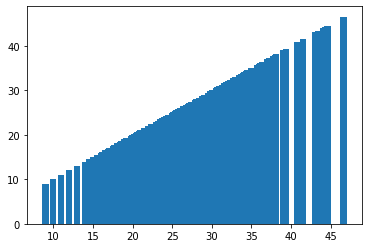

In [73]:
# 결측치를 제거한다.
df.dropna(axis=0, inplace=True)
df.head()
plt.bar(df.mpg,df.mpg)

In [34]:
# 명목형 변수인 Origin는 가변수 (dummy variable)로 변환하여 둔다. 
df = df.join(pd.get_dummies(df["origin"], drop_first=True)).drop(columns=["origin"])
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [35]:
# 설명 변수(X)들을 별도로 둔다.
df_X = df.drop(columns="mpg","cylinders")
column_names = df_X.columns
column_names

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'japan', 'usa'],
      dtype='object')

In [13]:
# 종속변수.
Y= df["mpg"]

In [14]:
# X 변수의 MinMaxScaler 전처리.
my_scaler = MinMaxScaler()
X_scaled = my_scaler.fit_transform(df_X.values)

In [15]:
# 전처리 된 X 변수.
df_X_scaled = pd.DataFrame(data=X_scaled, columns= column_names)
df_X_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0


#### 2.  ML(회귀) 모델 생성과 저장:

In [42]:
# 모델을 학습 시킨다.
my_regressor = RandomForestRegressor()
my_regressor.fit(df_X_scaled, Y)

my_Y_pred = my_regressor.predict(df_X_scaled)
my_Y_pred[]

SyntaxError: invalid syntax (<ipython-input-42-f9c41c0f6e85>, line 6)

In [17]:
# In-sample 결정계수 R^2를 계산해 본다.
rsq = my_regressor.score(df_X_scaled, Y)
print(f"In-sample 결정계수는 {rsq:0.3f} 입니다.")

In-sample 결정계수는 0.982 입니다.


In [18]:
# my_regressor 객체 저장.
with open("my_regressor.pkl","wb") as f:
    pickle.dump(my_regressor, f)

In [19]:
# my_scaler 객체 저장.
with open("my_scaler.pkl","wb") as f:
    pickle.dump(my_scaler, f)